In [237]:
%load_ext autoreload
%autoreload 2
import numpy as np
from entity import Entity
from task import *
from plant import Plant
from dc import DC
from retailer import Retailer
from customer import Customer
from indi import Individual
from crossover import *
from mutation import *
from GA import Model
from task_gen import *
from local_search import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
small_task = load_small_task(2)
medium_task = load_medium_task(2)
large_task = load_large_task(2)

In [239]:
np.random.seed(0)
model_ls = Model(200, 
              task=large_task, 
              crossover=TwoCutCrossover(), 
              mutation=InsertionMutation(), 
              localsearch=SimpleLocalSearch())
bfs_ls, _ = model_ls.fit(100, 200, 5, 20, True, 5)

Gen 0: best fitness 4998484.59290737
Gen 5: best fitness 4254625.1944373995
Gen 10: best fitness 3731111.9771642885
Gen 15: best fitness 3378438.39594585
Gen 20: best fitness 3055844.05994619
Gen 25: best fitness 2795418.6238692626
Gen 30: best fitness 2644301.930808253
Gen 35: best fitness 2565965.547488227
Gen 40: best fitness 2468132.088306604
Gen 45: best fitness 2393569.438128923
Gen 50: best fitness 2366299.621693032
Gen 55: best fitness 2349036.6683147447
Gen 60: best fitness 2344569.5101057845
Gen 65: best fitness 2344115.702407368
Gen 70: best fitness 2340278.391919498
Gen 75: best fitness 2340278.391919498
EARLY STOP


In [240]:
np.random.seed(0)
model = Model(200, 
              task=large_task, 
              crossover=TwoCutCrossover(), 
              mutation=InsertionMutation(), 
              localsearch=SimpleLocalSearch())
bfs, best_indi1 = model.fit(100, 200, 5, 0, True, 5)

Gen 0: best fitness 4998183.551144189
Gen 5: best fitness 4431458.657348629
Gen 10: best fitness 3971220.0078354524
Gen 15: best fitness 3680138.3339153845
Gen 20: best fitness 3376079.239737172
Gen 25: best fitness 3132868.7098231236
Gen 30: best fitness 2861983.798664443
Gen 35: best fitness 2802477.411460151
Gen 40: best fitness 2704683.164318769
Gen 45: best fitness 2562130.108689556
Gen 50: best fitness 2468793.011720062
Gen 55: best fitness 2366528.9938514307
Gen 60: best fitness 2317383.7458732803
Gen 65: best fitness 2268100.607342689
Gen 70: best fitness 2249109.706889483
Gen 75: best fitness 2212372.2080325386
Gen 80: best fitness 2195763.0691728434
Gen 85: best fitness 2181462.2236239617
Gen 90: best fitness 2177522.266485229
Gen 95: best fitness 2172742.1845221454
Gen 100: best fitness 2168733.892128955


In [241]:
np.random.seed(0)
model = Model(300, 
              task=large_task, 
              crossover=TwoCutCrossover(), 
              mutation=InsertionMutation(), 
              localsearch=SimpleLocalSearch())
bfs2, best_indi1 = model.fit(100, 300, 10, 0, True, 5)

Gen 0: best fitness 4883675.709563519
Gen 5: best fitness 4359282.420329117
Gen 10: best fitness 3959813.296648794
Gen 15: best fitness 3599783.906995359
Gen 20: best fitness 3328046.6987882694
Gen 25: best fitness 3127282.580016312
Gen 30: best fitness 2863947.7063031206
Gen 35: best fitness 2793092.613524757
Gen 40: best fitness 2604459.200511824
Gen 45: best fitness 2537038.3758063694
Gen 50: best fitness 2447727.1802087296
Gen 55: best fitness 2365149.886039757
Gen 60: best fitness 2273939.515367915
Gen 65: best fitness 2232317.666177114
Gen 70: best fitness 2192321.5501555232
Gen 75: best fitness 2150385.2512820936
Gen 80: best fitness 2123735.873574015
Gen 85: best fitness 2106555.4359770524
Gen 90: best fitness 2083320.149174632
Gen 95: best fitness 2072431.8624500094
Gen 100: best fitness 2070078.3012494543


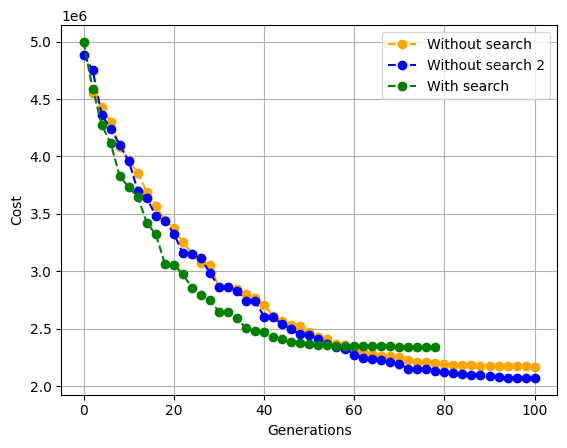

In [ ]:
fig, ax = plt.subplots()
x_ls = np.arange(0, len(bfs_ls), 2)
x = np.arange(0, len(bfs), 2)
x2 = np.arange(0, len(bfs2), 2)
ax.plot(x, bfs[::2], 'o--', label='Without search, pop size 200', color='orange')
ax.plot(x2, bfs2[::2], 'o--', label='Without search, pop size 300', color='blue')
ax.plot(x_ls, bfs_ls[::2], 'o--', label='With search, pop size 200', color='green')
plt.xlabel('Generations')
plt.ylabel('Cost')
plt.grid(True)
plt.legend()